<a href="https://colab.research.google.com/github/Manu-Gr/Assignment-SImple-Linear-Regression---Salary-Hike/blob/main/Assignment_SLR_Salary_Hike.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **Build a prediction model for Salary_hike**

In [ ]:
# import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels as smf

In [ ]:
data = pd.read_csv("Salary_Data.csv")
data.head()


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [ ]:
data.shape

(30, 2)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


**EDA AND VISUALIZATION**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


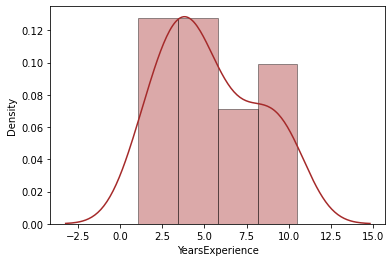

In [ ]:
import seaborn as sns
sns.distplot(data['YearsExperience'],color='brown',hist_kws =dict(edgecolor = 'black'))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


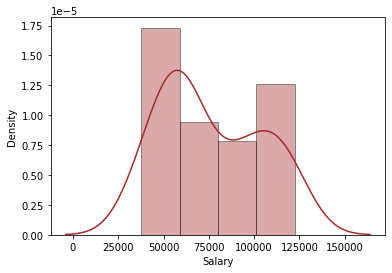

In [ ]:
import seaborn as sns
sns.distplot(data['Salary'],color='brown',hist_kws =dict(edgecolor = 'black'))

**Outlier Detection**

In [ ]:
data['YearsExperience'].describe()

count    30.000000
mean      5.313333
std       2.837888
min       1.100000
25%       3.200000
50%       4.700000
75%       7.700000
max      10.500000
Name: YearsExperience, dtype: float64

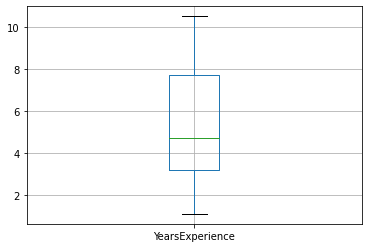

In [ ]:
# Boxplot

data.boxplot(column= ['YearsExperience'])

In [ ]:
data['Salary'].describe()

count        30.000000
mean      76003.000000
std       27414.429785
min       37731.000000
25%       56720.750000
50%       65237.000000
75%      100544.750000
max      122391.000000
Name: Salary, dtype: float64

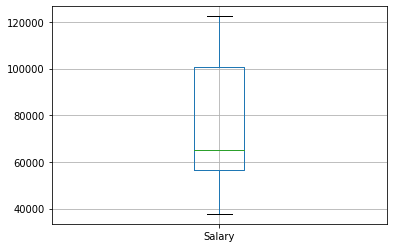

In [ ]:
# Boxplot

data.boxplot(column= ['Salary'])

In [ ]:
# There is no outliers in the dataset

**Corelation Analysis**

In [ ]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


**Fitting the Model**

In [ ]:
import statsmodels.formula.api as smf

model = smf.ols("Salary~YearsExperience",data=data).fit()

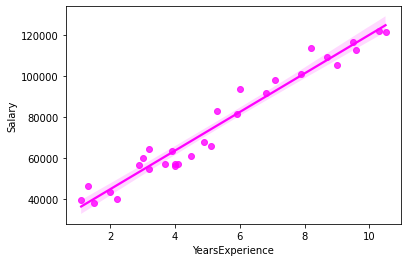

In [ ]:
sns.regplot(x="YearsExperience", y="Salary", data=data,color= 'magenta');

In [ ]:
#Coefficients
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [ ]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)  

Intercept          11.346940
YearsExperience    24.950094
dtype: float64 
 Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


**Checking Accuracy of Model using r2**

In [ ]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

Determination Coefficient = rsquared value = 0.95690 ; good fit = 95.69%

**Model** **Prediction**

In [ ]:
# Manual Prediction

In [ ]:
Salary = 25792.200199 + 9449.962321*(8)  # lets years of experience as 8
Salary

101391.898767

In [ ]:
# Automatic Prediction

In [ ]:
#Predict for 8,9,5,10 sorting_time
newdata=pd.Series([8,9,5,10])

In [ ]:
data_pred=pd.DataFrame(newdata,columns=['YearsExperience'])
data_pred

,YearsExperience
0,8
1,9
2,5
3,10


In [ ]:
model.predict(data_pred)

0    101391.898770
1    110841.861092
2     73042.011806
3    120291.823413
dtype: float64